In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('./datafile/greenbuildings.csv')
df

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889,157117,1230,1300000,1.15,137.51,100.00,41,35,0,1,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7890,158379,1230,16140,1.15,152.73,75.22,8,90,1,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7891,52316,1230,15726,1.15,158.92,100.00,6,67,0,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7892,158124,1230,51300,1.15,198.99,100.00,12,91,0,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72


In [3]:
df.columns

Index(['CS_PropertyID', 'cluster', 'size', 'empl_gr', 'Rent', 'leasing_rate',
       'stories', 'age', 'renovated', 'class_a', 'class_b', 'LEED',
       'Energystar', 'green_rating', 'net', 'amenities', 'cd_total_07',
       'hd_total07', 'total_dd_07', 'Precipitation', 'Gas_Costs',
       'Electricity_Costs', 'cluster_rent'],
      dtype='object')

In [4]:
# Filter data to specifications
df = df[df['leasing_rate'] > 10]
# Mutate on a class_c
df['class_c'] = 1 - (df['class_a'] + df['class_b'])
green_mask = df['green_rating'] == 1
green_df = df[green_mask]
non_green_df = df[~green_mask]

/var/folders/q3/hm2wt3010319t7l0hz8w8s4h0000gn/T/ipykernel_18147/3276458083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class_c'] = 1 - (df['class_a'] + df['class_b'])


First, I validated that the Excel guru's calculations were correct. The median of rent per square foot is about $2.60 larger for green building compared to non-green buildings.

In [5]:
green_df['Rent'].median()

27.6

In [6]:
non_green_df['Rent'].median()

25.03

After validating that their calculations were correct, I wanted to understand other summary statistics from the green and non-green buildings. 

In [7]:
green_df.agg(['mean', 'median']).T

,mean,median
CS_PropertyID,397688.684211,280379.0000
cluster,623.429825,489.5000
size,325965.169591,241199.0000
empl_gr,3.506032,2.3800
Rent,30.028480,27.6000
leasing_rate,89.412427,92.9250
stories,15.346491,11.0000
age,23.880117,22.0000
renovated,0.213450,0.0000
class_a,0.798246,1.0000


In [8]:
non_green_df.agg(['mean', 'median']).T

,mean,median
CS_PropertyID,439015.976698,313254.000000
cluster,586.822731,477.000000
size,231007.177984,123250.000000
empl_gr,3.156511,1.970000
Rent,28.444779,25.030000
leasing_rate,84.440520,89.650000
stories,13.681630,10.000000
age,49.308077,36.000000
renovated,0.397856,0.000000
class_a,0.370122,0.000000


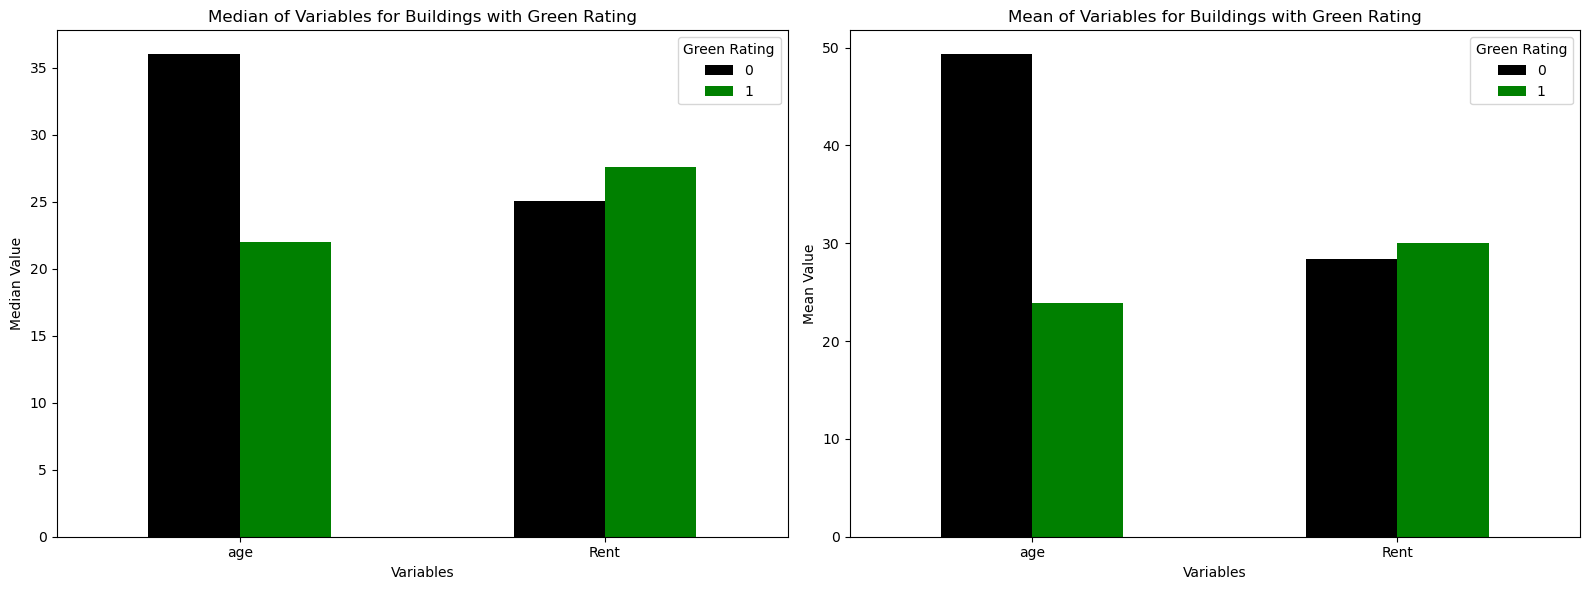

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Group data by 'green_rating' and calculate the median and mean for each group
median_by_green_rating = df.groupby('green_rating')[['age', 'Rent']].median()
mean_by_green_rating = df.groupby('green_rating')[['age', 'Rent']].mean()

# Plotting Median
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Set the color palette to green and white
color_palette = ['black', 'green']

median_by_green_rating.T.plot(kind='bar', ax=ax1, color=color_palette)
ax1.set_title('Median of Variables for Buildings with Green Rating')
ax1.set_xlabel('Variables')
ax1.set_ylabel('Median Value')
ax1.legend(title='Green Rating')
ax1.tick_params(axis='x', rotation=0)

# Plotting Mean
mean_by_green_rating.T.plot(kind='bar', ax=ax2, color=color_palette)
ax2.set_title('Mean of Variables for Buildings with Green Rating')
ax2.set_xlabel('Variables')
ax2.set_ylabel('Mean Value')
ax2.legend(title='Green Rating')
ax2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


Comparing rent directly between green or non-green isn't a fair comparison. There are other factors (confounders) that are correlated with the 'greenness' of the building that also affect the rent price. As you can see from the age bar graph, the median age of a green is about 10 years younger than the median age of a non-green building. Intuitively, I assume that newer apartments may have more expensive rents. We will check the relationship between Rent and age in the next step. 

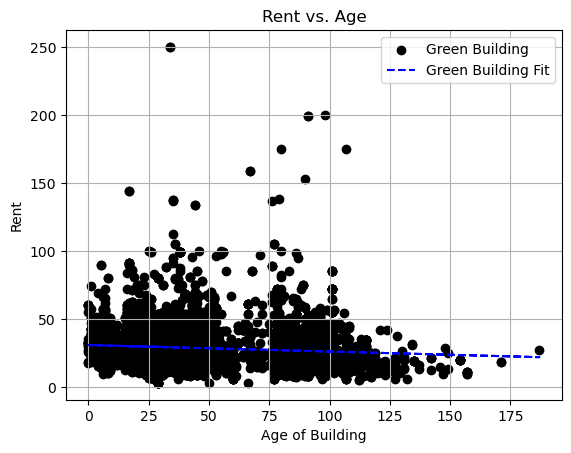

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Scatter plot
plt.scatter(df['age'], df['Rent'], color='black', label='Green Building')

# Fit linear regression models
model = LinearRegression()
model.fit(df[['age']], df['Rent'])

# Plot lines of best fit
plt.plot(df['age'], model.predict(df[['age']]), color='blue', linestyle='dashed', label='Green Building Fit')

# Customize plot
plt.xlabel('Age of Building')
plt.ylabel('Rent')
plt.title('Rent vs. Age')
plt.legend()
plt.grid(True)

# Display plot
plt.show()


Overall, we can see a slightly negative relationship between Rent and the age of the building, meaning that older apartments relate to lower rent prices. This is one of many factors that were not held constant in the initial assessment. In order to truly understand the financial impacts of green buildings we must account for confounders that have biased relationships with rent, which may promote a distorted and inaccurate relationship between rent and the greenness of the building. 

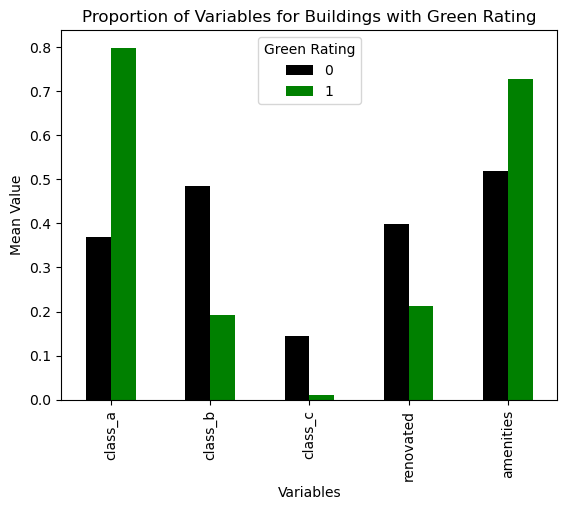

In [11]:
mean_by_green_rating = df.groupby('green_rating')[['class_a', 'class_b', 'class_c', 'renovated', 'amenities']].mean()

# Plotting Mean
mean_by_green_rating.T.plot(kind='bar', color = color_palette)
plt.title('Proportion of Variables for Buildings with Green Rating')
plt.xlabel('Variables')
plt.ylabel('Mean Value')
plt.legend(title='Green Rating')

plt.show()

Similarly, there is a higher proportion of green buildings that are considered class_a compared to class_b or class_c. Class_a represents that the building is nicer. This is another clear confounder to the initial analysis and complicates the relationship between green buildings and rent price. Additionally, there is a higher proportion of green buildings with access to amenities compared to non-green buildings. This could also garner a higher price for rent. A higher proportion of the non-green building are renovated than the green buildings which may be related to the difference in age that we previously discussed. The point is that when evaluating the relationship between Rent and green buildings we must hold other factors constant to measure the true relationship. 

We do not agree with the conclusion that the difference in median rent for green apartments and non-green apartments is an appropriate measure in the difference in prices. We must also consider confounders that have relationships with both variables. We can adjust for confounder using regression techniques and considering how different variables affect the Rent.